# Evaluation of Risk

Risk will be evaluated as running the trimming and clustering algorithms to acheive sets of clustered nodes.

The metrics for how many clusters the node belong in will be a factor to determin an indivudual nodes risk. The other metric will be to evaluate a node with repsect to its neighbours. The lower the risk of it's neighbours the lower the risk of the respective node.

Risk can be caluculated at a node level, cluster level and over all network level. The task is to mimimise risk according to these resolutions.



In [2]:
import Network_Generator as ng

In [3]:
import EDM_Generator as eg

In [4]:
import numpy as np

In [5]:
import networkx as nx

In [6]:
import Graph_Analyser as ga

In [10]:
import Plotting as plot

In [508]:
import time
start_time = time.time()

In [7]:
edm = eg.generate_random_sparse_edm((30,30),99,10,1,0)

COMPOSED SPARSE EDM:
[[99.   6.   4.5  6.5  3.5  3.   6.5  1.5  7.   6.   5.   5.5  3.   8.
   4.5  6.   7.5  8.5  4.5  2.5  6.   6.5  6.5  5.5  6.   4.5  7.   7.
   8.   5. ]
 [ 6.  99.   2.5  6.5  4.5  4.   3.5  6.   2.5  4.   8.   7.5  4.   9.5
   6.5  4.5  5.5  4.5  6.5  6.   4.   4.5  8.5  9.   2.5  8.   2.5  3.
   3.5  4. ]
 [ 4.5  2.5 99.   4.   3.   6.   7.5  8.   2.   5.   6.   6.   1.5  4.
   5.   5.5  8.   4.5  5.5  8.   5.5  3.   2.5  6.   5.5  5.   2.5  2.5
   7.5  8.5]
 [ 6.5  6.5  4.  99.   6.5  5.5  2.   3.   2.   4.5  5.5  6.   7.5  8.
   7.   5.5  5.   1.   2.   1.5  4.   4.5  7.5  9.   4.   6.   4.5  9.
   9.5  3. ]
 [ 3.5  4.5  3.   6.5 99.   5.5  4.   4.5  5.   5.5  9.   3.5  4.5  5.5
   8.   1.5  8.5  4.   5.   8.5  1.   7.5  6.   2.   3.   8.   1.5  8.5
   4.5  5.5]
 [ 3.   4.   6.   5.5  5.5 99.   7.5  4.   6.   4.5  7.5  7.   5.5  9.
   2.   3.5  5.   8.   6.   2.5  4.5  4.   2.5  4.5  7.   5.5  7.5  1.
   6.5  6. ]
 [ 6.5  3.5  7.5  2.   4.   7.5 99.   6.5  9.

In [11]:
graph = ga.gen_sparse_graph(edm=edm)


GENERATED GRAPH:


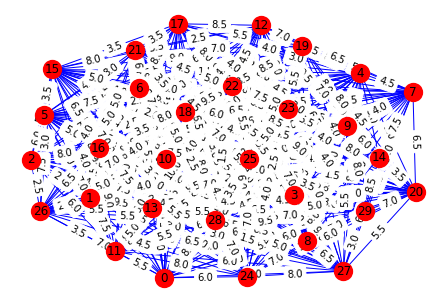

In [12]:
plot.plot(graph)

In [13]:
import Graph_Reducer as gr

In [14]:
reduced_graph, entropy_matrix = gr.Reduce_Graph(edm=edm,graph=graph)

[0]
[0, 1]
[0, 2]
[0, 19, 3]
[0, 4]
[0, 5]
[0, 19, 16, 6]
[0, 7]
[0, 19, 8]
[0, 7, 9]
[0, 7, 10]
[0, 7, 11]
[0, 12]
[0, 7, 13]
[0, 14]
[0, 19, 8, 15]
[0, 19, 16]
[0, 7, 17]
[0, 18]
[0, 19]
[0, 4, 20]
[0, 12, 21]
[0, 7, 22]
[0, 23]
[0, 19, 24]
[0, 25]
[0, 4, 26]
[0, 7, 13, 27]
[0, 7, 28]
[0, 29]
[1, 0]
[1]
[1, 2]
[1, 8, 3]
[1, 26, 4]
[1, 5]
[1, 6]
[1, 27, 13, 7]
[1, 8]
[1, 9]
[1, 8, 19, 10]
[1, 8, 11]
[1, 12]
[1, 27, 13]
[1, 5, 14]
[1, 8, 15]
[1, 28, 16]
[1, 17]
[1, 18]
[1, 8, 19]
[1, 20]
[1, 21]
[1, 2, 22]
[1, 27, 23]
[1, 24]
[1, 8, 15, 25]
[1, 26]
[1, 27]
[1, 28]
[1, 29]
[2, 0]
[2, 1]
[2]
[2, 3]
[2, 4]
[2, 27, 5]
[2, 1, 6]
[2, 13, 7]
[2, 8]
[2, 9]
[2, 10]
[2, 12, 11]
[2, 12]
[2, 13]
[2, 14]
[2, 8, 15]
[2, 8, 19, 16]
[2, 17]
[2, 18]
[2, 8, 19]
[2, 4, 20]
[2, 21]
[2, 22]
[2, 27, 23]
[2, 1, 24]
[2, 25]
[2, 26]
[2, 27]
[2, 22, 28]
[2, 8, 15, 29]
[3, 19, 0]
[3, 8, 1]
[3, 2]
[3]
[3, 8, 15, 4]
[3, 19, 5]
[3, 6]
[3, 7]
[3, 8]
[3, 9]
[3, 19, 10]
[3, 8, 11]
[3, 2, 12]
[3, 7, 13]
[3, 17, 14]
[3,

In [15]:
entropy_matrix = entropy_matrix / min(entropy_matrix)


GENERATED GRAPH:


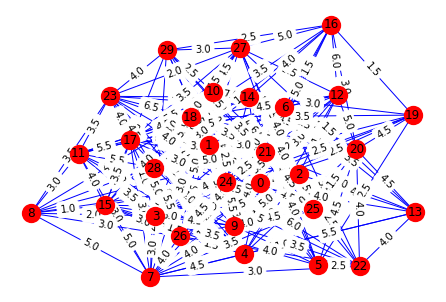

In [16]:
plot.plot(reduced_graph)

In [841]:
import Clustering as clust

In [842]:
max_edge = sorted(graph.edges.data('weight'), 
                      key=lambda x:x[2])[len(graph.edges)-1][2]
#max_edge

In [843]:
entropy_matrix = entropy_matrix / max(entropy_matrix)
#entropy_matrix

In [849]:
from copy import copy, deepcopy

In [850]:
entropy_matrix_test = deepcopy(entropy_matrix)
graph_test = graph
growth_rate = 0.25

clusters = []

iteration = 1
graph_edges = list(graph.edges.data('weight'))
min_entropy = 0
max_edge = sorted(graph.edges.data('weight'), key=lambda x:x[2])[len(graph.edges)-1][2]
while min_entropy < max_edge:
    #iterate the node in the graph
    #print("Iteration:",iteration)
    #node is the currently selected node
    for node in range(len(entropy_matrix_test)):
        #entropy_mnatrix[node] is the entropy value of that node
        node_entropy = entropy_matrix_test[node]
        #print("Node:", node , "Entropy:",node_entropy)
        if node_entropy > max_edge:
            continue
        #local_cluster will store the clusters for this itteration
        local_cluster = []
        #get all other nodes that reside within the radius of the nodes entropy
        for edge in range(len(graph_edges)):
            if graph_edges[edge][0] == node:
                if graph_edges[edge][2] <= node_entropy:
                    local_cluster.append(np.array([graph_edges[edge][0],graph_edges[edge][1],graph_edges[edge][2]]))
                    #print("Distance from Node:", node, "To Node:",graph_edges[edge][1], "is <=",node_entropy)
        if len(local_cluster) > 0:
            clusters.append(np.array(local_cluster))        

    #increase entropy of the node by the growth rate
    #entropy_matrix_test *= 1+growth_rate
    entropy_matrix_test += growth_rate
    min_entropy = min(entropy_matrix_test)
    #print(entropy_matrix_test)
    #print(min_entropy)
    iteration+=1
    
#display clusters
#clusters


In [855]:
def init_list_of_objects(size):
    list_of_objects = list()
    for i in range(0,size):
        list_of_objects.append( list() ) #different object reference each time
    return list_of_objects

In [856]:
grouped_clusters = init_list_of_objects(len(entropy_matrix))

In [859]:
for cluster in range(len(clusters)):
    #print(len(clusters[cluster]),clusters[cluster])
    cluster_size = len(clusters[cluster])
    grouped_clusters[cluster_size-1].append(clusters[cluster])

In [862]:
unique_grouped_clusters = init_list_of_objects(len(grouped_clusters))
#Get Unique entries to each group
for group in range(len(grouped_clusters)):
    if len(grouped_clusters[group]) > 0:
        unique_grouped_clusters[group] = np.unique(grouped_clusters[group],axis=0)


In [863]:
#for cl in range(len(unique_grouped_clusters)):
    #print("Cluster Size:", cl , "Clusters:", len(unique_grouped_clusters[cl]))

In [1]:
print("%s seconds" % (time.time() - start_time))

NameError: name 'time' is not defined

## From this point on the graph will be analysed for risk at the node and cluster level as well as an overall risk given as the max risk of all nodes in the network

- Risk is measured from 0 (no risk) up to 1 (very high risk)
- Effectors are what pass on risk to enighbouring nodes or clusters. 


- should the scalar for the cluster ranking be:
    - size of (1 / local cluster)
    - size of (1 / entire graph)


- ranking of cluster
    - apply networkX pageRank to the clusters rather than nodes
        - the clusters will have a risk (rank) when initialised
        - the initial risk can be the distance from the optimal number of nodes in a cluster hard 0 applied to values above optimal (max)
    - the abstraction of calculating the rank of the clusters is for simplicity and can be made to work on the node level
    


In [ ]:
def clculate_network_risk(clusters):
    graph_risk = 0
    cluster_risk = []
    node_risks = []
    #iterate over all clusters
    for cluster in clusters: 
    #assign all clusters a risk of 1 (max risk)
    #assign all nodes in each cluster a risk of 1
    #for each cluster claculate the risk of the cluster as the sum of the risk of its nodes and the node effector    
    
    
    return graph_risk, cluster_risks, node_risks

In [ ]:
def clculate_cluster_risk(cluster, effectors, ranking_rounds:
    cluster_risks = []
    node_risks = []
    cluster_rank_matrix = generate_cluster_matrix(cluster, effectors)
    scaling_matrix = generate_scaling_matrix(scalar, len(cluster))
    
    apply_ranking(cluster_rank_matrix, scaling_matrix,ranking_rounds)
    
    
    return cluster_risks

In [53]:
def generate_cluster_matrix(cluster, effectors):
    #iterate the cluster and get the initial "risk" for each node in the adjacency matrix
    
    
    return matrix
    

In [356]:
def generate_scaling_matrix(scale, size):
    #generate a 1D matrix of the "size" and with the values all as "scale"
    
    return matrix
    

In [357]:
def generate_cluster_centriod_graph(clusters, node_count):
    graph = nx.Graph()
    
    for i in range(node_count):
        graph.add_node(i)
    
    #iterate over all nodes up to the max number of nodes
    for i in range(node_count):
        current_intersecting_clusters = []
        for cluster in range(len(clusters)):
            #search for interecting clusters
            if (set([i]) & set(clusters[cluster])):
                current_intersecting_clusters.append(clusters[cluster],i
                                                     np.intersect1d([i],
                                                                    clusters[cluster],
                                                                    return_indices=True)[1])
        #add intersections as edges on the graph
        for overlap in range(len(current_intersecting_clusters)):
            graph.add_node(current_intersecting_clusters[overlap][0][current_intersecting_clusters[overlap][2]])
            graph.add_edge(i,current_intersecting_clusters)
        
    return graph
    
    

In [592]:
def apply_page_rank(graph, offset, alpha=0.85):
    return nx.pagerank(graph, alpha=alpha, personalization=offset)
    
def apply_page_rank_numpy(graph, offset, alpha=0.85):
    return nx.pagerank_numpy(graph, alpha=alpha, personalization=offset)

def apply_page_rank_numpy(graph, alpha=0.85):
    return nx.pagerank_numpy(graph, alpha=alpha)
    
def apply_page_rank_scipy(graph, offset, alpha=0.85):
    return nx.pagerank_scipy(graph, alpha=alpha, personalization=offset)

# Test code for drawing new centriod cluster graph

[0, (1, 9, 6, 4)]
[1, (2, 6, 1, 4)]
[2, (3, 7, 2, 5, 9)]
[3, (4, 6, 8, 0)]
Checking (1, 9, 6, 4) : (2, 6, 1, 4)
3
intersection: [1, 4, 6]
[3. 3. 0. 0.]
Checking (1, 9, 6, 4) : (3, 7, 2, 5, 9)
1
intersection: [9]
[4. 3. 1. 0.]
Checking (1, 9, 6, 4) : (4, 6, 8, 0)
2
intersection: [4, 6]
[6. 3. 1. 2.]
Checking (2, 6, 1, 4) : (1, 9, 6, 4)
3
intersection: [1, 4, 6]
[9. 6. 1. 2.]
Checking (2, 6, 1, 4) : (3, 7, 2, 5, 9)
1
intersection: [2]
[9. 7. 2. 2.]
Checking (2, 6, 1, 4) : (4, 6, 8, 0)
2
intersection: [4, 6]
[9. 9. 2. 4.]
Checking (3, 7, 2, 5, 9) : (1, 9, 6, 4)
1
intersection: [9]
[10.  9.  3.  4.]
Checking (3, 7, 2, 5, 9) : (2, 6, 1, 4)
1
intersection: [2]
[10. 10.  4.  4.]
Checking (3, 7, 2, 5, 9) : (4, 6, 8, 0)
0
intersection: []
[10. 10.  4.  4.]
Checking (4, 6, 8, 0) : (1, 9, 6, 4)
2
intersection: [4, 6]
[12. 10.  4.  6.]
Checking (4, 6, 8, 0) : (2, 6, 1, 4)
2
intersection: [4, 6]
[12. 12.  4.  8.]
Checking (4, 6, 8, 0) : (3, 7, 2, 5, 9)
0
intersection: []
[12. 12.  4.  8.]

GENERATE

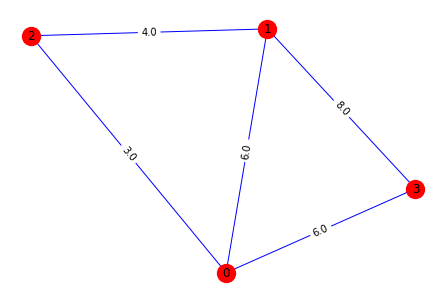

In [603]:
from itertools import compress
clusters = [
    [[1,9,4],[1,6,8],[1,4,5]],
    [[2,6,4],[2,1,3],[2,4,6]],
    [[3,7,4],[3,2,1],[3,5,2],[3,9,7]],
    [[4,6,4],[4,8,3],[4,0,6]],
]
node_count = 10
graph = nx.Graph()

centriod_nodes = []
#iterate over the clusters 
for cluster in range(len(clusters)):
    temp_centriod = []
    temp_centriod.append(cluster)
    #store all nodes in the cluster
    centriod_nodes_inner = []
    for node in range(len(clusters[cluster])):
        if node == 0:
            centriod_nodes_inner.append(clusters[cluster][node][0])
        centriod_nodes_inner.append(clusters[cluster][node][1])
    temp_centriod.append(tuple(centriod_nodes_inner))
    centriod_nodes.append(temp_centriod)
    print(temp_centriod)
    
#give cluster a number of nodes (0,[1,9,6,4]), (1,[2,6,1,4]), (2,[3,7,2,5,9]), (3,[4,6,8,0])

for cent in range(len(centriod_nodes)):
    graph.add_node(centriod_nodes[cent][0])

#store edges of nodes visited 
vistited_nodes = np.zeros(len(centriod_nodes))
for cent in range(len(centriod_nodes)):
    for comp_cent in range(len(centriod_nodes)):
        #skip self
        if cent == comp_cent:
            continue
        #checks for list intesection at centriod 
        print("Checking",centriod_nodes[cent][1],":",centriod_nodes[comp_cent][1])
        intersections = list(set(centriod_nodes[cent][1]).intersection(set(centriod_nodes[comp_cent][1])))
        intersect_count = len(intersections)
        print(intersect_count)
        print("intersection:",intersections)
        if intersect_count > 0:
            #add edges between intersecting centriods
            #if cent in vistited_nodes and comp_cent in vistited_nodes:
            #currently only add the first intersection  
            #perhaps coalesce values from edge weights and then augment the graph with the edge. (faster)
            for inter in range(intersect_count):        
                #get each intersection and add the corresponding edge to the graph
                #ToDo
                graph.add_edge(cent,comp_cent,weight=sorted([vistited_nodes[cent],vistited_nodes[comp_cent]])[0]+1)
                vistited_nodes[comp_cent]+=1
                vistited_nodes[cent]+=1
            
        print(vistited_nodes)
            
plot.plot(graph)

In [601]:
start_time = time.time()
ranking = apply_page_rank_numpy(graph,0.8)
print("%s seconds" % (time.time() - start_time))
ranking

0.0010001659393310547 seconds


{0: 0.2511968880909635,
 1: 0.30371035308198685,
 2: 0.22254637941352476,
 3: 0.22254637941352484}

Need to implement a method to generate the dictionay to pass to the page rank algorithm
this will be based on the initial risk values for each node when calculated against:
  - the optimal overlaps 
  - the optimal intersections with other clusters